<a href="https://colab.research.google.com/github/nv-github1/my-repo1/blob/master/Nandita_Venkatesh_Unit3_EndProject_HRTurnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips for the unit 3 HR Employee Turnover Project...

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objective:
- To understand what factors contributed most to employee turnover.
- To perform clustering of employees who left based on their satisfaction and evaluation.
- To create a model that predicts the likelihood that a certain employee will leave the company or not.
- To create or improve different retention strategies for targeted employees.

## Import the Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Read the dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/datascience/HR_comma_sep.csv')

Examine the dataset

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Good idea to rename columns for readability...

In [7]:
df = df.rename(columns={'satisfaction_level': 'satisfaction',
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [8]:
# Examine the shape
df.shape

(14999, 10)

In [9]:
# Examine the DataFrame with the new column names
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


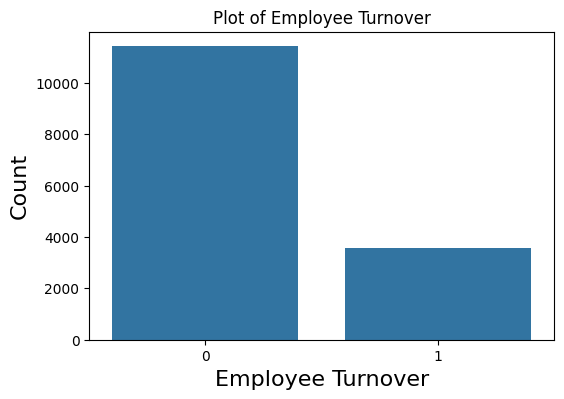

In [10]:
# Plot the employee turnover
#?
#?
#?

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='turnover')

plt.title('Plot of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


Tried the same plot with 2 code pieces, just to try out. I did use ChatGPT help for the above piece (sns.countplot() one). The below one I did.

0 - Employee stayed,
1 - Employee left.

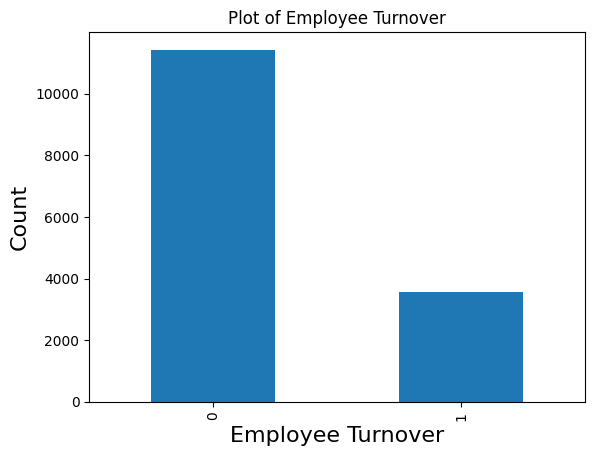

In [11]:

df['turnover'].value_counts().plot(kind='bar')

plt.title('Plot of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


In [12]:
# check to see if there are any missing values in the dataset
df.isnull().any()

,0
satisfaction,False
evaluation,False
projectCount,False
averageMonthlyHours,False
yearsAtCompany,False
workAccident,False
turnover,False
promotion,False
department,False
salary,False


In [13]:
# Check the type of features
df.dtypes

,0
satisfaction,float64
evaluation,float64
projectCount,int64
averageMonthlyHours,int64
yearsAtCompany,int64
workAccident,int64
turnover,int64
promotion,int64
department,object
salary,object


##Understand what factors contributed most to employee turnover by EDA

In [14]:
# Display the statistical overview of the employees
round(df.describe(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


##Correlation Matrix

In [15]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = df.corr(numeric_only=True)
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


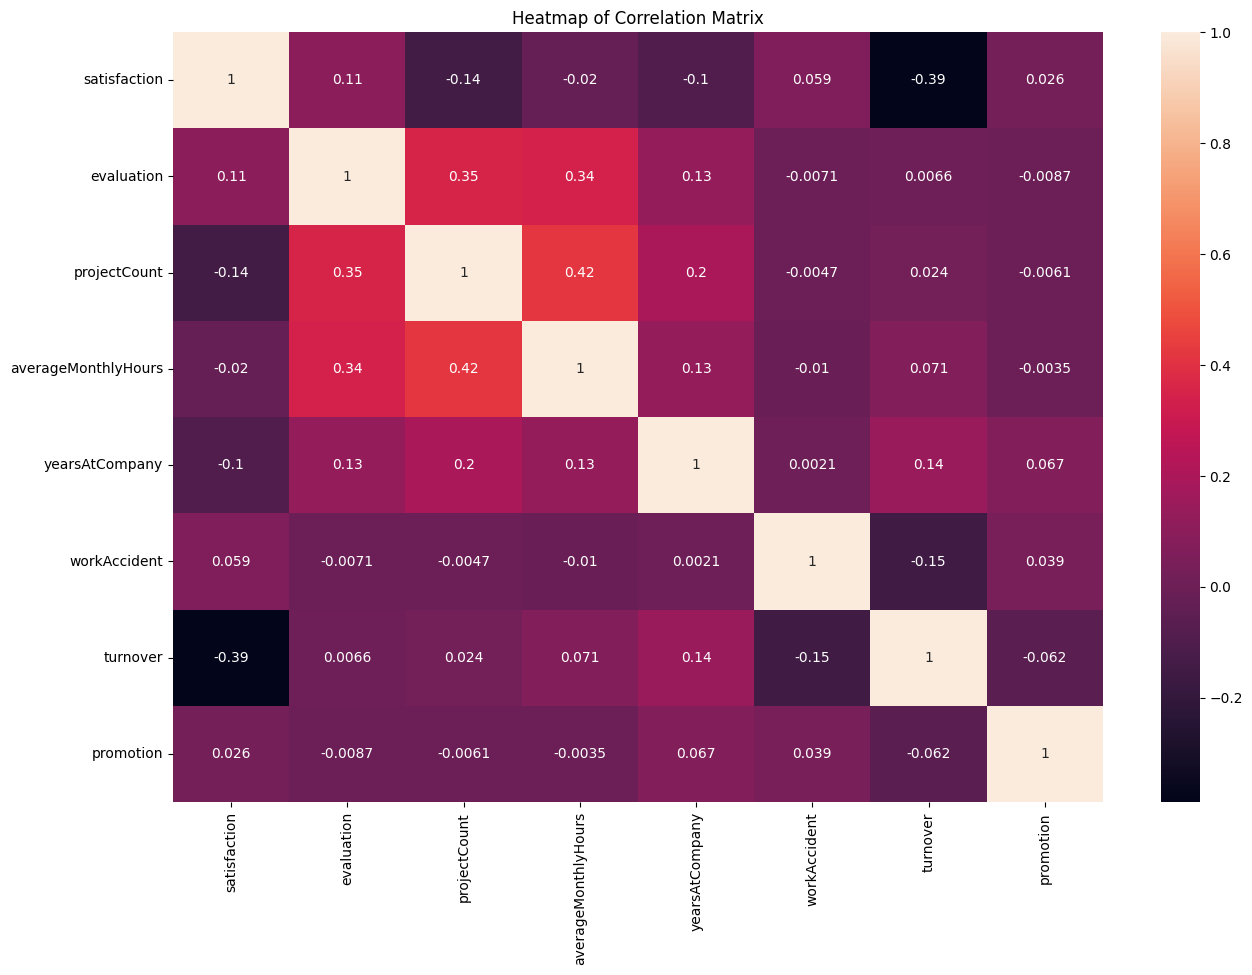

In [16]:
# Show the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix');
plt.show()

## Plot the distribution of employee satisfaction, evaluation, and project count.

**To plot these I did them twice**

- At first I did this one where the plots are one after another.

- Then, I used ChatGPT help to plot the 3 plots side-by-side -  It looks very cool!





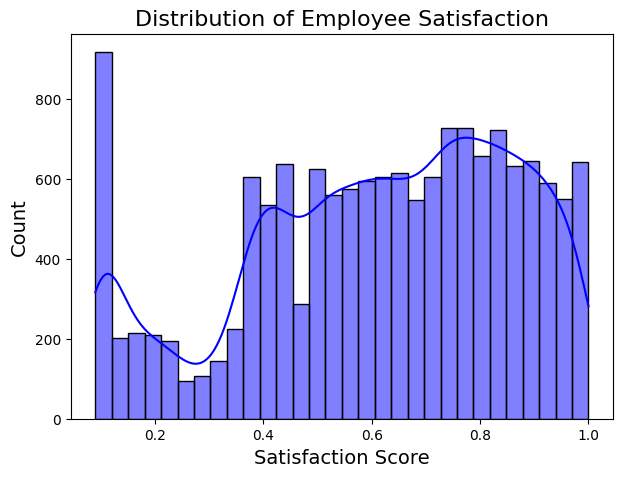

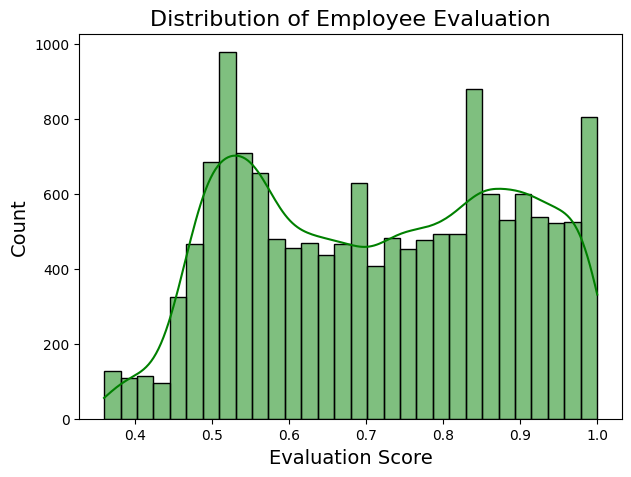

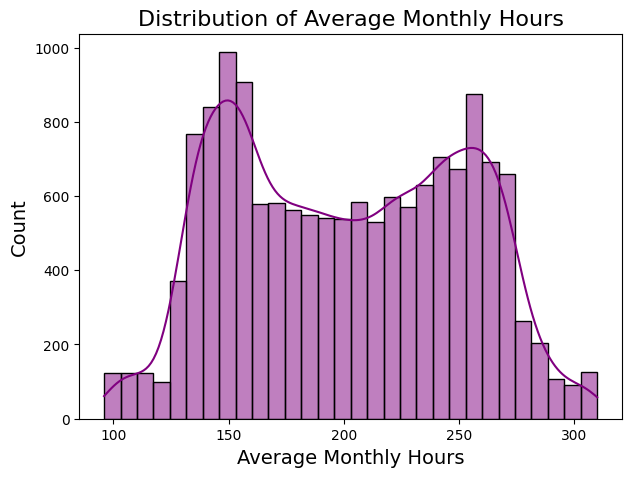

In [18]:
# Set up the matplotlib figure
#?
# Graph Employee Satisfaction
#?
# Graph Employee Evaluation
#?
# Graph Employee Average Monthly Hours
#?


# Employee Satisfaction Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['satisfaction'], bins=30, kde=True, color='blue')
plt.title('Distribution of Employee Satisfaction', fontsize=16)
plt.xlabel('Satisfaction Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Employee Evaluation Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['evaluation'], bins=30, kde=True, color='green')
plt.title('Distribution of Employee Evaluation', fontsize=16)
plt.xlabel('Evaluation Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
# Employee Average Monthly Hours
plt.figure(figsize=(7,5))
sns.histplot(df['averageMonthlyHours'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Monthly Hours', fontsize=16)
plt.xlabel('Average Monthly Hours', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()



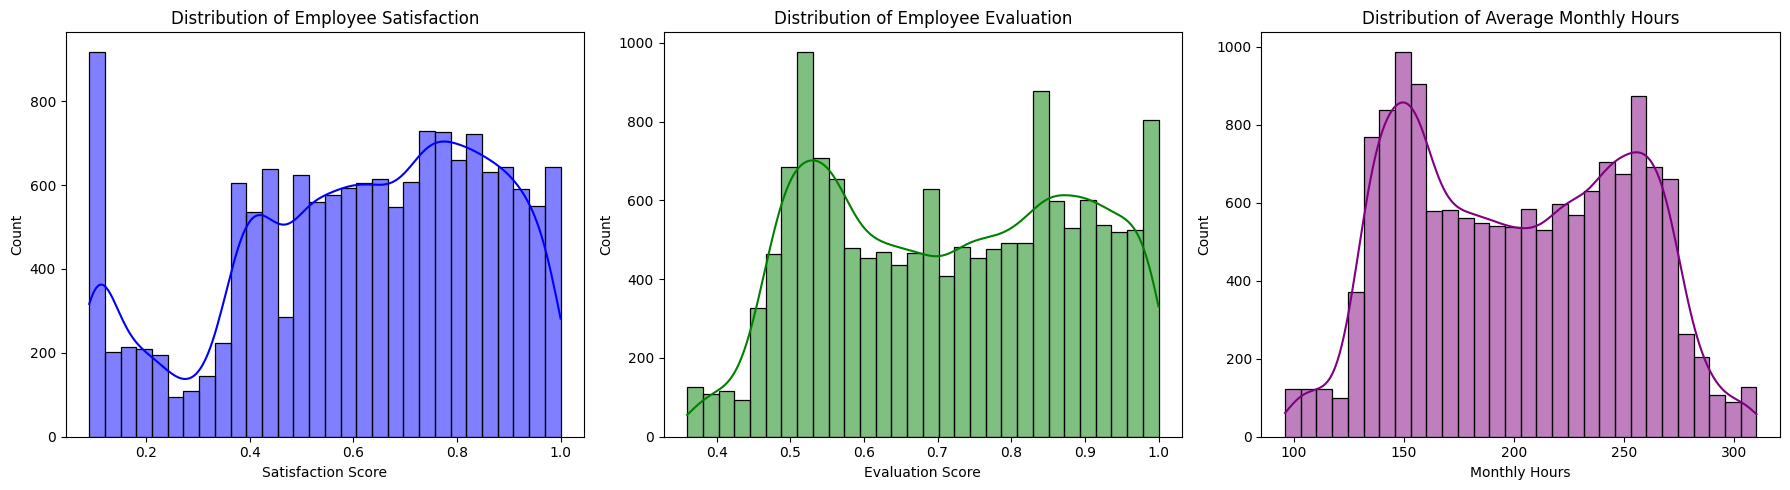

In [19]:

# Set up the matplotlib figure
#?
# Graph Employee Satisfaction
#?
# Graph Employee Evaluation
#?
# Graph Employee Average Monthly Hours
#?

# Set up the matplotlib figure
plt.figure(figsize=(18,5))
# tried 3 plots side-by-side using ChatGPT help as mentioned above

#
# Graph Employee Satisfaction
#
plt.subplot(1, 3, 1)    # 1 row, 3 columns, first plot
sns.histplot(df['satisfaction'], bins=30, kde=True, color='blue')
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')

#
# Graph Employee Evaluation
#
plt.subplot(1, 3, 2)    # second plot
sns.histplot(df['evaluation'], bins=30, kde=True, color='green')
plt.title('Distribution of Employee Evaluation')
plt.xlabel('Evaluation Score')
plt.ylabel('Count')

#
# Graph Employee Average Monthly Hours
#
plt.subplot(1, 3, 3)    # third plot
sns.histplot(df['averageMonthlyHours'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Monthly Hours')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



**Employee Satisfaction Distribution**

1. The curve shows how satisfied employees are (0 = least satisfied, 1 = most satisfied).
2. Satisfaction helps predict whether an employee stays or leaves.
3. The dataset shows that there are many employees with low satisfaction, which plays an important factor in the turnover.

**Employee Evaluation Distribution**

1. Most employees seem to have medium to high evaluation scores.
2. Very low evaluation can result in underperformance.
3. Having high evaluation and having high workload can lead to burnout. This leads to possibility of employees leaving.

**Employee Average Monthly Hours Distribution**

1. A normal cluster is around 150 to 200 hours and a high-hours cluster is 250 to 300+ hours.
2. Employees with extremely high monthly hours often overlap with:
higher evaluation, many projects and probably higher turnover

This can be interpreted as a sign of overwork and stress in the organization. This leads to employee burnout and employee dissatifaction. This increases the chances of employee leaving the porganization.

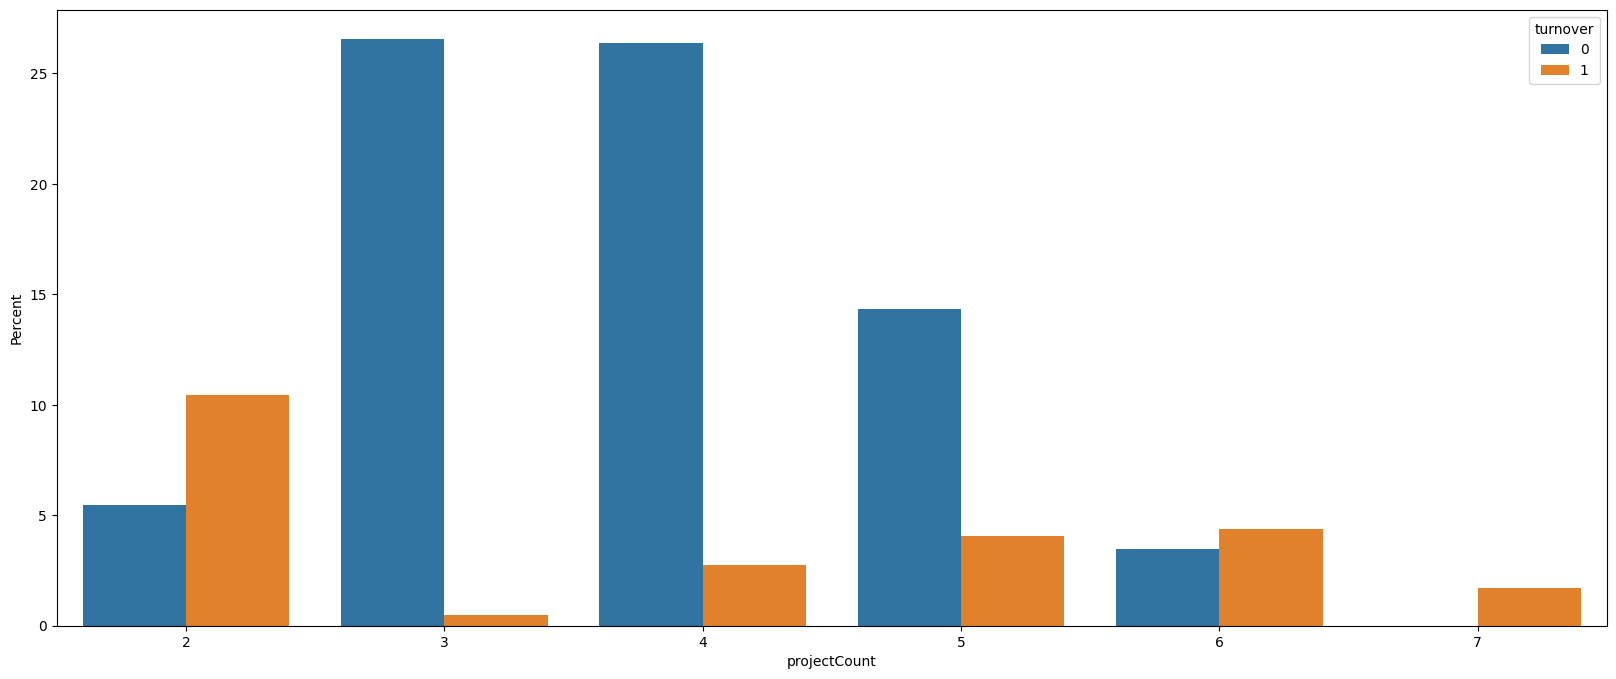

In [20]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent");

As per my understanding:
The height of each bar is the percentage of total employees who stayed (0) or left (1) for that project count.

. employees with 2 projects may feel under-utilized. Hence turnover may be more.
. employees with 3 or 4 projects seem to have similar retention level, probably due to moderate workload.
. When projects become 5 and 6, the workload increases and we see a trend of turnover increasing.  
. It is the highest with 7 projects, where the employee has a very high workload, causing burnouts, which in turn lead to increased turnover.

Therefore, very few projects and many projects showed a trend of increased turnover.
**Project count becomes a major turnover predictor.**

##Perform clustering of employees who left based on their satisfaction and evaluation

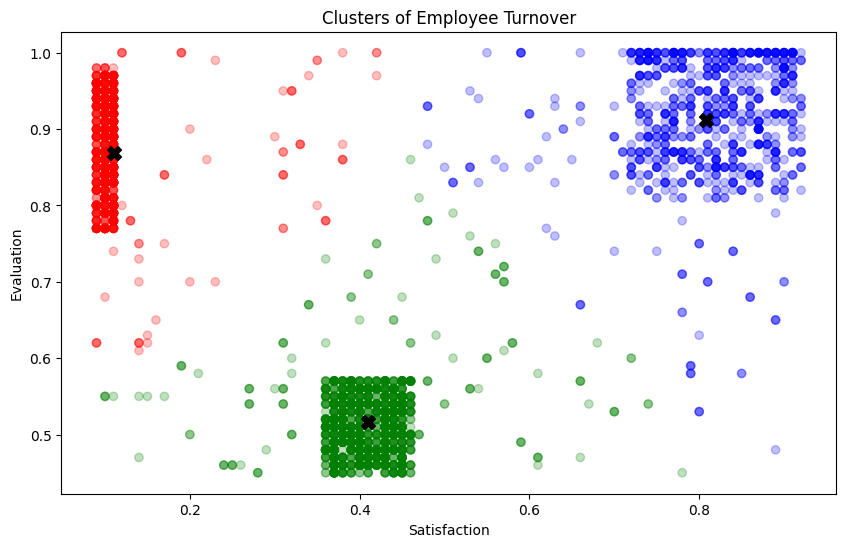

In [21]:
# Import k-means model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of employee turnover
#??

#kmeans_colors = ?

# Step 1: subset only employees who left
left_df = df[df['turnover'] == 1].copy()

# Step 2: select the two features for clustering
X_cluster = left_df[['satisfaction', 'evaluation']]

# Step 3: create and fit the KMeans model (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
left_df['cluster'] = kmeans.fit_predict(X_cluster)

# Step 4: map cluster labels to colors for plotting
cluster_color_map = {0: 'red', 1: 'green', 2: 'blue'}
kmeans_colors = left_df['cluster'].map(cluster_color_map)


fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")

plt.show();

The clusters show 3 types of employees -
Cluster A: employees who have low satisfaction and low evaluation, probably low performers

Cluster B: employees with low satisfaction and high evaluation because they are high performers who are unhappy. Most often they are the overworked group who may or may not be rewarded enough for their work

Cluster C: employees with Moderate satisfaction and evaluation. If they are leaving it probably is for better benefits (basically other reasons that satisfaction, evaluation, etc)

## Handle the left Class Imbalance using SMOTE technique...

#### Pre-process the data by converting categorical columns to numerical:
- Separate categorical variables from numeric variables.
- Apply get_dummies() to the categorical variables.
- Combine categorical variables and numeric variables.

In [22]:
cat_var = ['department','salary','turnover','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True, dummy_na=True)
numerical_df = df[num_var] #keeping numeric variables

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()
print(new_df.head())


   turnover  promotion  department_RandD  department_accounting  \
0         1          0             False                  False   
1         1          0             False                  False   
2         1          0             False                  False   
3         1          0             False                  False   
4         1          0             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  ...  \
0                   False              True               False  ...   
1                   False              True               Fals

In [23]:
# Examine the new DataFrame...
new_df.shape
print(new_df.shape)

(14999, 21)


In [24]:
# Train/test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [25]:
print(X_train.shape)
print(X_test.shape)

(11999, 20)
(3000, 20)


In [26]:
# Apply SMOTE
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [27]:
print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (18284, 20) (18284,)


## Perform 5-fold cross validation model training and evaluate performance

### You need to train 3 models:

1. Logistic Regression Classifier
2. Random Forest Classifier
3. Gradient Boosting Classifier

## Logistic Regression Classifier

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


# Logistic Regression model
lr = make_pipeline(
    StandardScaler(),        # scale features
    LogisticRegression(max_iter=2000)
)

# Fit on the SMOTE-balanced training data we did earlier

lr = lr.fit(x_train_sm, y_train_sm)

lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

### Apply 5-Fold Cross Validation on Logistic Regression

In [30]:
#lr_result = cross_val_score(?)
#lr_result.mean()

# Applying the 5-Fold Cross Validation on the LR above

lr_result = cross_val_score(
    lr,
    x_train_sm,
    y_train_sm,
    cv=5,
    scoring='roc_auc'
)
lr_result.mean()


np.float64(0.8598905441520148)

### Logistic Regression Classifier AUC

In [31]:
print ("\n\n ---Logistic Regression Model---")
y_pred_lr_proba = lr.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, y_pred_lr_proba)

print ("Logistic Regression AUC = %2.2f" % lr_auc)

print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.82
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.75      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=123
)
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier(n_estimators=200, random_state=123)

### Apply 5-Fold Cross Validation on Random Forest

In [33]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

np.float64(0.9837367706120993)

In [34]:
rf_result = cross_val_score(
    rf,
    x_train_sm,
    y_train_sm,
    cv=5,
    scoring='roc_auc'
)
rf_result.mean()


np.float64(0.9976980468485683)

In the 2 panels above - while performing the 5-fold cross validation - How do I know which scoring type to choose?

If scoring = f1, the value is 0.9837
If scoring = roc_auc, the value is 0.9976 <- this is a better value than the f1 one.

**So, How do I choose which one to use?**

### Random Forest Classifier AUC

In [35]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
#rf_roc_auc = ?

y_pred_rf_proba = rf.predict_proba(X_test)[:,1]
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)


print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 1.00
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



## Gradient Boosting Classifier


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=200,
    random_state=123
)
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier(n_estimators=200, random_state=123)

### Apply 5-Fold Cross Validation on Gradient Boosting Classifier

In [37]:
#gbc_result = ?

gbc_result = cross_val_score(
    gbc,
    x_train_sm,
    y_train_sm,
    cv=5,
    scoring='roc_auc'
)

gbc_result.mean()

np.float64(0.9946124212289054)

### Gradient Boosting Classifier AUC

In [39]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")

gbc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])
print("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))

#gbc_auc = ?



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.99
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



### ROC Graph

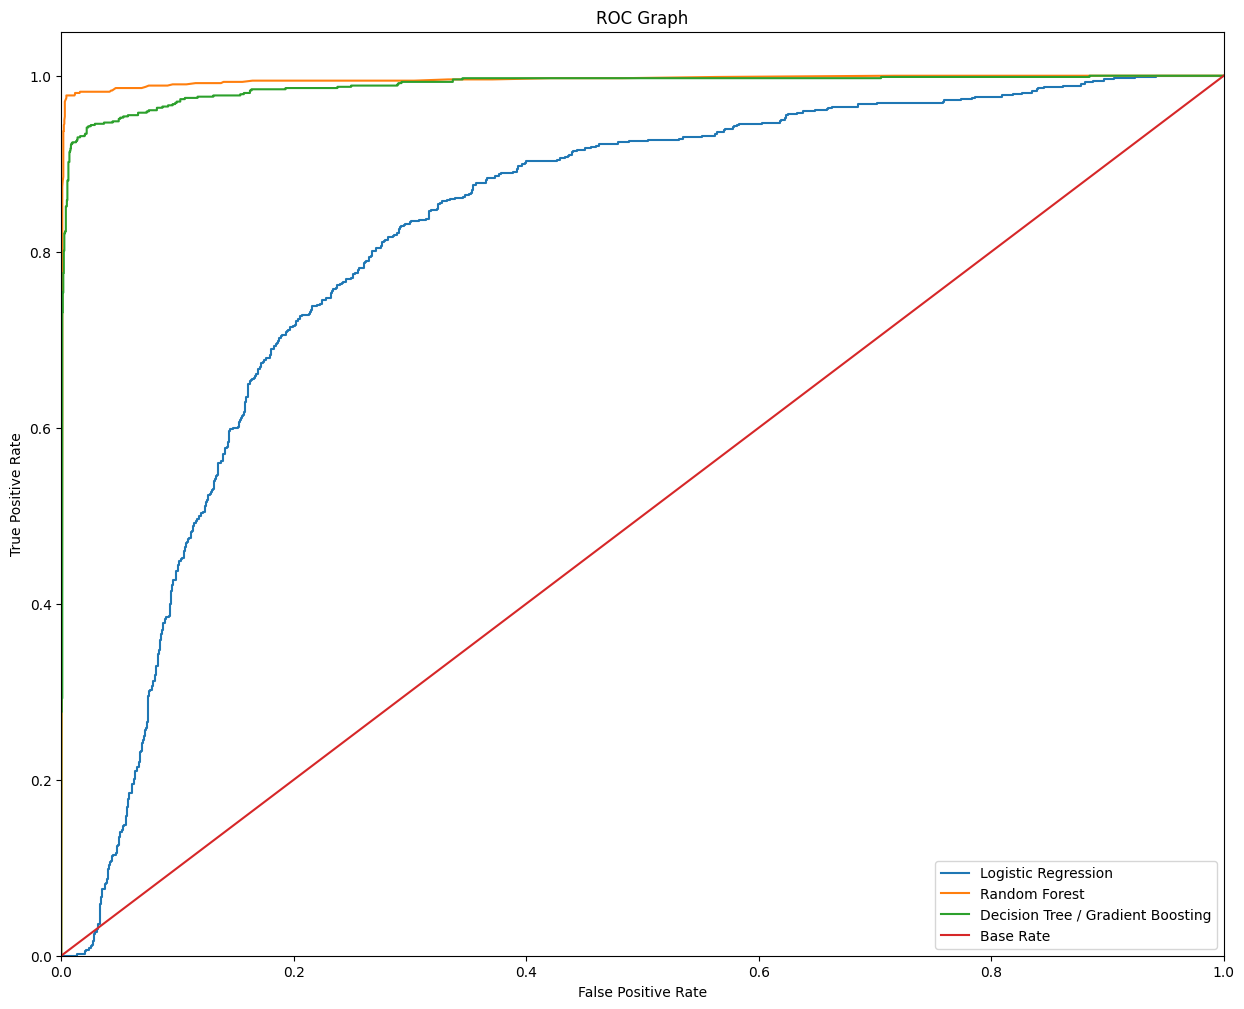

In [40]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

y_pred_gbc_proba = gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_proba)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_pred_rf_proba)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, y_pred_gbc_proba)


plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression')

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest')

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Decision Tree / Gradient Boosting')

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();

In [43]:
# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
confusion_matrix(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Confusion Matrix:
[[1766  520]
 [ 181  533]]


In [44]:
# Confusion Matrix for GBC
print("Gradient Boosting Confusion Matrix:")
confusion_matrix(y_test, gbc.predict(X_test))
y_pred_gbc = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred_gbc))

Gradient Boosting Confusion Matrix:
[[2237   49]
 [  47  667]]


In [45]:
# Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
confusion_matrix(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Confusion Matrix:
[[2266   20]
 [  16  698]]


## Recall or Precision

Discuss the focus of your model, recall or precision, and why.

1. Recall (for class 1 = left): Among all the employees who actually left, how many did we actually correctly flag as leavers?

2. Precision (for class 1): Among all the employees that we predicted will leave, how many actually left?

It is a mistake to miss an 'at-risk' employee (false negative) than to worry about an employee who would actually be staying (false positive).
So, having false alarms is alright and an acceptable issue, than missing putential at-risk people who may leave. HR should look at these too for retention of employees and reduce turnover.


### Test various retention strategies on targeted employees

### Predict the probability of employee turnover in the test data using the best model.

I took the help of ChatGPT to do the ranking of the employees using the turnover probability. My best model based on the highest AUC is the Random Forest with 1, hence used that here.

In [48]:


# Predict probabilities with best model
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Copy test features and add actual information and predicted information

test_results = X_test.copy()
test_results["left_actual"] = y_test.values
test_results["prob_turnover"] = y_test_proba

def risk_zone(p):
    if p < 0.2:
        return "Safe (Green)"
    elif p < 0.6:
        return "Low-Risk (Yellow)"
    elif p < 0.9:
        return "Medium-Risk (Orange)"
    else:
        return "High-Risk (Red)"

test_results["risk_zone"] = test_results["prob_turnover"].apply(risk_zone)

# Count employees in each zone
print(test_results["risk_zone"].value_counts())

# Look at first few rows
test_results.head()


risk_zone
Safe (Green)            2171
High-Risk (Red)          649
Low-Risk (Yellow)        121
Medium-Risk (Orange)      59
Name: count, dtype: int64


,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,...,salary_nan,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left_actual,prob_turnover,risk_zone
10627,0,False,False,False,False,False,False,True,False,False,...,False,0.98,0.77,3,191,2,0,0,0.000,Safe (Green)
2703,0,False,False,True,False,False,False,False,False,False,...,False,0.76,0.93,3,271,5,0,0,0.750,Medium-Risk (Orange)
6059,0,False,True,False,False,False,False,False,False,False,...,False,0.70,0.93,3,185,4,0,0,0.060,Safe (Green)
3258,0,False,False,False,False,False,False,False,True,False,...,False,0.48,0.61,3,223,3,1,0,0.015,Safe (Green)
4565,0,False,False,False,False,False,False,False,False,False,...,False,0.57,0.90,3,144,2,0,0,0.005,Safe (Green)


I thought a Scatter plot will help in showing the zones with the colors.
Please let me know if there is a better way to showcase this.

I thought maybe I will use a bar chart, but was not too sure about it. So, I  went ahead with the scatter plot.
I took ChatGPT help in arriving at the code for this.

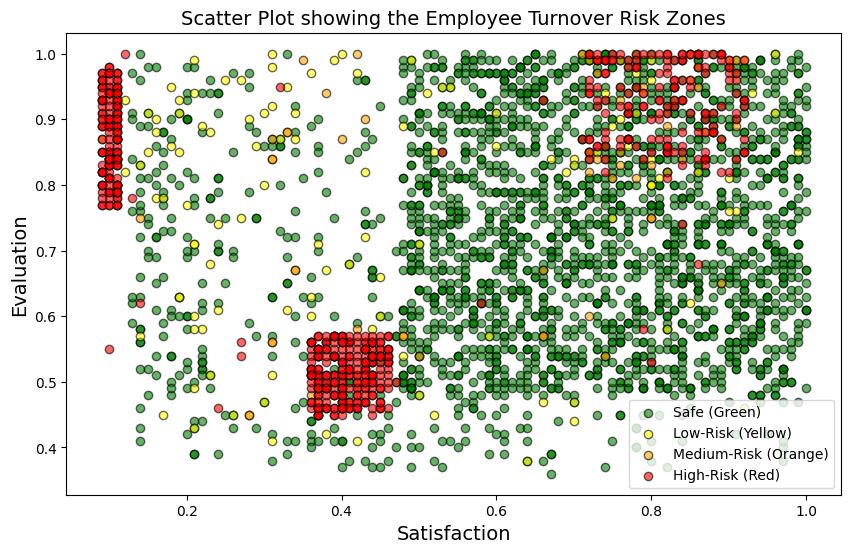

In [51]:
# Custom colors for risk zones
zone_colors = {
    "Safe (Green)": "green",
    "Low-Risk (Yellow)": "yellow",
    "Medium-Risk (Orange)": "orange",
    "High-Risk (Red)": "red"
}

plt.figure(figsize=(10,6))

# Scatter plot colored by risk zone
for zone, color in zone_colors.items():
    zone_data = test_results[test_results["risk_zone"] == zone]
    plt.scatter(
        zone_data["satisfaction"],
        zone_data["evaluation"],
        label=zone,
        color=color,
        alpha=0.6,
        edgecolor="black"
    )

plt.xlabel("Satisfaction", fontsize=14)
plt.ylabel("Evaluation", fontsize=14)
plt.title("Scatter Plot showing the Employee Turnover Risk Zones", fontsize=14)
plt.legend()
plt.show()


In [49]:
# Ranking turnover probability for employees
#best_model?.predict_proba(X_test)

# Select best model based on AUC
best_model = rf

# Predict probabilities on test data
turnover_proba = best_model.predict_proba(X_test)[:,1]

# Ranking employees by turnover probability
turnover_risk = pd.DataFrame({
    "turnover_actual": y_test.values,
    "turnover_probability": turnover_proba
}).sort_values(by="turnover_probability", ascending=False)

turnover_risk.head()


,turnover_actual,turnover_probability
2976,1,1.0
712,1,1.0
717,1,1.0
721,1,1.0
1671,1,1.0


## Provide your conclusion, including a retention plan...

**Conclusion and Retention Plan**

**Business goal**

Portobello Tech wanted to:
- Understand which factors contribute to employees leaving the company.
- Predict which employees are at higher risk of leaving.
- Use these predictions to design retention strategies.

-----
**What we did:**

Using the historical HR data from Portobello Tech, an end-to-end pipeline was built to understand and predict employee turnover.
We found the following:
.Exploratory analysis and correlation heatmaps showed that low satisfaction, high workload and longer tenure are strongly associated with turnover.
.Clustering the employees who left (based on satisfaction and evaluation) showed that there were 3 main groups:
1. Low satisfaction, low evaluation (under-performers)
2. Low satisfaction, high evaluation (high performers - burnout or under-rewarded)
3. Moderately satisfied, average evaluation (likely to leave because of pay, career growth kind of opportunities).

We used SMOTE to balance the data after converting categorical variables to numeric and compared the three models: Logistic Regression, Random Forest, and Gradient Boosting, using 5-fold cross-validation and ROC AUC.
We saw that **The Random Forest** scored the **highest test AUC of 1** and hence was the best model.
HR always has a priority to correctly identify the at-risk employees. Therefore, we focussed on recall than just being accurate.

As a last step, we used the best model to assign each employee with a probability of turnover. This helped group them into the following risk zones - safe, low risk, medium risk, high risk.

**Recommendations:**

For medium and high risk employees, targeted interventions like workload balance, 1-on-1 discussions, reviewing salaries and probably promotions too are recommended actions.

With this kind of proactivity, Portobello Tech can probably retain good performers and help improve employee satisfaction thus reducing unwanted turnover.